# Feature Selection / Feature Engineer: Why Does It Work

In this notebook, we argue that feature selection and feature engineer may povide crucial component for an end to end machine learning project. We present with theoretical and empirical results correct model specification can be achieved using proposed feature selection and feature engineer methodology. Only then will consctructed classification rule makes sense in both interpretability and also prediction performance.

All rights reserved by Professor Shaw-hwa Lo and more information can be found on his [site](https://confluence.columbia.edu/confluence/display/statgene/Shaw-Hwa+Lo). Related papers please refer to Lo (2002, 2009, 2012).

### Motivation

we are interested to select the most important (influential, predictive) variables out of vast amount of noisy variables under small amount of sample size in a data. We are also interested in mechanically engineer new feature that recover the information preserved in a variable module.

### Feature Selection

Given $X$ and $Y$, let us define influence score (or I-score) to be the following
$$
\text{I}(X,Y) := \sum_{j \in \Pi} n_j^2 (\bar{Y}_j - \bar{Y})^2
$$
while $j$ indicates the $j^\text{th}$ partition in $\Pi$ which is the overall partition generated by $X$. 

If size of number of parameters gets extremely large, we also introduce a greedy search algorithm called Backward Dropping Algorithm (short for BDA). The Backward Dropping Algorithm states the following:
- Randomly select $k$ variables each round of Backward Dropping Algorithm;
- Take turns and drop each variable of the $k$ variables; and compute I-score; 
- Drop the variable that leads to the highest I-score, here we have $k-1$ variables left;
- Go back to first step and start again.

In the end, we report the variable set with the highest I-score and its associated I-score.

### Feature Engineer

In addition, let us also construct engineered features based on interaction-based variable sets. In other words, given $X$, we can construct
$$
X^{\dagger} := \bar{y}_j, \forall j \in \Pi
$$
while $\Pi$ is the total possible partitions generated by selected variable sets $X$ and $j$ indicates the $j^{\text{th}}$ partition in $\Pi$. The values of $X^{\dagger}$ is replaced with $\bar{y}_j$ which is the local average of resposne variable from each partition $j$.

### Artificial Example

Let us draw random variables from Bernoulli distribution and create data $X_1, ..., X_p$ and define underyling model to be
$$y = \left\{
\begin{matrix}
X_1 + X_2 & (\text{mod } 2) \\
X_3 + X_4 + X_5 & (\text{mod } 2) \\
\end{matrix}
\right.
$$

The goal of this example is correct model specification. We want to capture the important information and in this case we want the two variable modules. If we can successfully capture the important variable modules, we do not even need to worry about what type of machine learning algorithm to choose.

In [2]:
from scipy.stats import bernoulli
import pandas as pd
import numpy as np

In [3]:
n = 1000
N = n + 1000
cutoff = round(n/N, 1)
p = 30
data_bern = bernoulli.rvs(size=N*p, p=0.5)

X = pd.DataFrame(data_bern.reshape([N, p]), columns=np.arange(p).astype(str))
print(X.shape)
print(X.head(2))

I = bernoulli.rvs(size=N, p=0.5)
print(np.mean(I))
y1 = np.mod(X.iloc[:, 1] + X.iloc[:, 2], 2)
y2 = np.mod(X.iloc[:, 2] + X.iloc[:, 3] + X.iloc[:, 4], 2)
y = np.where(I == 1, y1, y2)
print(np.mean(y))

(2000, 30)
   0  1  2  3  4  5  6  7  8  9  ...  20  21  22  23  24  25  26  27  28  29
0  1  0  1  1  1  0  0  1  1  0  ...   1   0   1   1   1   0   1   0   1   1
1  0  1  1  1  1  0  0  1  0  0  ...   0   1   0   1   0   1   0   1   1   0

[2 rows x 30 columns]
0.4985
0.5


In [13]:
%run "../scripts/InteractionBasedLearning.py"
InteractionBasedLearning.InteractionLearning

----------------------------------------------------------------------------------------------------

        ################ Interaction-based Learning Statistical Package #################
        ### For more information, please go to "Research" page of www.YinsCapital.com ###
        
----------------------------------------------------------------------------------------------------
README:
This script has the following functions:

    (1) iscore(): this function computes the I-score of selected X at predicting Y
    (2) BDA(): this function runs through Backward Dropping Algorithm once
    (3) InteractionLearning(): this function runs many rounds of BDA and 
                               finalize the variables selcted according to I-score
    
ACKNOWLEDGEMENT:
This script is not-fot-profit and it is a production of my research 
during my time at Columbia University.
----------------------------------------------------------------------------------------------------


<function __main__.InteractionBasedLearning.InteractionLearning>

In [6]:
tmpResult = InteractionBasedLearning.InteractionLearning(
    newX=X,
    y=y,
    testSize=cutoff,
    num_initial_draw=9,
    total_rounds=200,
    top_how_many=2,
    nameExists=True,
    TYPE=str,
    verbatim=True)

100%|██████████| 200/200 [02:25<00:00,  1.38it/s]


Time Consumption (in sec): 145.04
Time Consumption (in min): 2.42
Time Consumption (in hr): 0.04


In [7]:
tmpResult['Brief'].head()

,Modules,Score
100,"[[1, 2]]",29.144559
140,"[[2, 3, 4]]",15.413241
33,"[[22, 23, 28]]",1.801436
143,"[[26, 29]]",1.726989
63,"[[16, 22, 27]]",1.564814


In [8]:
tmpResult['New Data'].head()

,1,2,0,2,3,4,0
0,0,1,0.758350,1,1,1,0.745174
1,1,1,0.259557,1,1,1,0.745174
2,0,1,0.758350,1,0,1,0.263566
3,1,0,0.747412,0,1,0,0.763052
4,0,0,0.242661,0,0,1,0.747899


### Machine Learning: Building Classifier

To test our idea about the importance of feature selection and feature engineer, we build classifier using a 3-layer neural network using original data set. Then we build classifier using the same 3-layer neural network architecture using important variable moduels and interaction-based features. In the end, we observe that proposed method deliver test set performance similar to that of theoretical prediction while original method does not hit the benchmark.

In [233]:
%run "../scripts/YinsDL.py"

---------------------------------------------------------------------

        Yin's Deep Learning Package 
        Copyright © YINS CAPITAL, 2009 – Present
        For more information, please go to www.YinsCapital.com
        
---------------------------------------------------------------------


In [68]:
YinsDL.NN3_Classifier

<function __main__.YinsDL.NN3_Classifier>

Let us try using original data first.

- We use a simple 3-layer neural network architecture first;
- Then we use a more comlicated 10-layer neural network architecture to test again.

We print the performance results in both L1 loss and area under curve.

Shape of X training set: (1000, 30) Shape of X in test set: (1000, 30)
First few obs of y: [1 1 1 0 1]
Tensorflow Version:
2.0.0
Summary of Network Architecture:
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 128)               3968      
_________________________________________________________________
dense_112 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_113 (Dense)            (None, 2)                 130       
Total params: 12,354
Trainable params: 12,354
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 0s 462us/sample - loss: 0.7357 - accuracy: 0.5180
Epoch 2/50
1000/1000 [==============================] - 0s 42us/sample - loss: 0.6369 - a

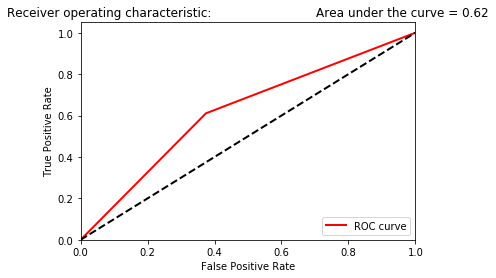

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=cutoff, random_state=0)
print('Shape of X training set:', X_train.shape, 'Shape of X in test set:', X_test.shape)
print('First few obs of y:', y_train[:5])

testresult = YinsDL.NN3_Classifier(X_train, y_train, X_test, y_test, 
                                 l1_act='relu', l2_act='relu', l3_act='softmax',
                                 layer1size=128, layer2size=64, layer3size=2,
                                 num_of_epochs=50, plotROC=True, verbose=True)

Tensorflow Version:
2.0.0
Summary of Network Architecture:
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 128)               3968      
_________________________________________________________________
dense_75 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_76 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_77 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_78 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_79 (Dense)             (None, 64)                4160      
____________________________________________________________

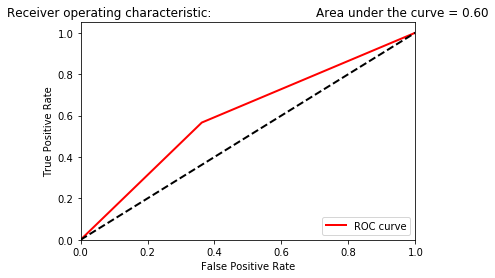

In [71]:
tmp = YinsDL.NN10_Classifier(
        X_train, y_train, X_test, y_test, 
        l1_act='relu', l2_act='relu', l3_act='relu', l4_act='relu', l5_act='relu',
        l6_act='relu', l7_act='relu', l8_act='relu', l9_act='relu', l10_act='softmax',
        layer1size=128, layer2size=64, layer3size=64, layer4size=64, layer5size=64, 
        layer6size=64, layer7size=64, layer8size=64, layer9size=64, layer10size=2,
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
        num_of_epochs=50,
        plotROC=True,
        verbose=True)

Last but not least, let us dare to attempt convlutional neural network with one convolutional layer and three neural network layers. This architecture might be too complicated for this data and hence I expect poor performance.

Please notice that *inputSHAPEwidth* and *inputSHAPElength* needs to multiply to be exactly the number of features. Otherwise the algorithm cannot successfully reshape an observation into grid structure.

Tensorflow Version:
2.0.0
Shapes of X in training set (1000, 10, 3) Shapes of X in test set: (1000, 10, 3)
Summary of Network Architecture:
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 128)               2432      
_________________________________________________________________
dense_127 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_128 (Dense)            (None, 2)                 130       
Total params: 10,818
Trainable params: 10,818
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 0s 77us/sample - loss: 0.7461 - accuracy: 0.5100
Epoch 2/50
1000/1000 [==============================] - 0s 32us/sample - loss: 0.6819 - accuracy: 0.5760
Epoch 3

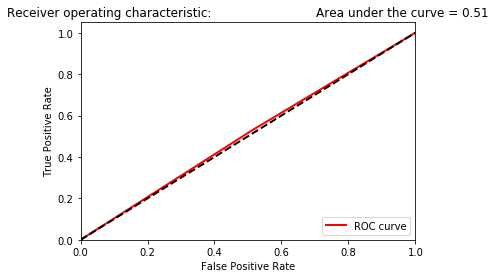

In [181]:
cnnTmpResult = YinsDL.C1NN3_Classifier(
        X_train, y_train, X_test, y_test, 
        inputSHAPEwidth=10, inputSHAPElenth=3,
        filter1 = [[1,0], [0,1]],
        l1_act='relu', l2_act='relu', l3_act='softmax',
        layer1size=128, layer2size=64, layer3size=2,
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
        num_of_epochs=50,
        plotROC=True,
        verbose=True)

Notice that the filter is defined as 
$$
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
$$
and this is completely arbitrary. Though the algorithm runs fine, the prediction results has not been great. This is because as the variable $[X_1, X_2, X_3, X_4]$ line up and are inserted in a square. The filter will actually pick up $X_1$ and $X_3$ which is not quite the correct model. 

However, we can design the following filter
$$
\begin{bmatrix}
1 & 1 \\
1 & 0 \\
\end{bmatrix}
$$
and this should be able to pick up some signal due to the positioning of variables in the grid. However, this observation is not replicable because I already know what the data looks like. In reality, one needs high computing power to search for the ideal filter.

Tensorflow Version:
2.0.0
Shapes of X in training set (1000, 10, 3) Shapes of X in test set: (1000, 10, 3)
Summary of Network Architecture:
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 128)               2432      
_________________________________________________________________
dense_139 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_140 (Dense)            (None, 2)                 130       
Total params: 10,818
Trainable params: 10,818
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 0s 395us/sample - loss: 0.7535 - accuracy: 0.5330
Epoch 2/50
1000/1000 [==============================] - 0s 83us/sample - loss: 0.6533 - accuracy: 0.6300
Epoch 

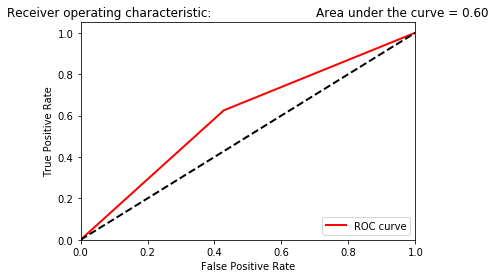

In [226]:
cnnTmpResult = YinsDL.C1NN3_Classifier(
        X_train, y_train, X_test, y_test, 
        inputSHAPEwidth=10, inputSHAPElenth=3,
        filter1 = [[1,1], [1,0]],
        l1_act='relu', l2_act='relu', l3_act='softmax',
        layer1size=128, layer2size=64, layer3size=2,
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
        num_of_epochs=50,
        plotROC=True,
        verbose=True)

We can also upgrade our algorithm to an even more advanced version: an architecture with two convolutional layer and three neural network layer, i.e. C2NN3.

Tensorflow Version:
2.0.0
Shapes of X in training set (1000, 9, 10) Shapes of X in test set: (1000, 9, 10)
The 1st convolutional layer is done.
Time Consumption (in sec): 134.76
Time Consumption (in min): 2.25
Time Consumption (in hr): 0.04
Shape of X in training set: (1000, 7, 8)
The 2nd convoluational layer is done. Shape of X in training set: (1000, 7, 8)
Time Consumption (in sec): 113.45
Time Consumption (in min): 1.89
Time Consumption (in hr): 0.03
Summary of Network Architecture:
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 128)               5504      
_________________________________________________________________
dense_145 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_146 (Dense)            (None, 2)                 130       
Total params: 13,890
Tra

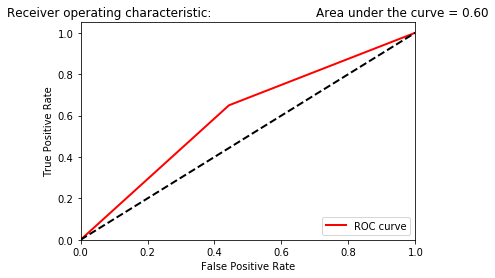

In [235]:
cnnTmpResult = YinsDL.C2NN3_Classifier(
        pd.concat([X_train, X_train, X_train], axis=1), y_train, 
        pd.concat([X_test, X_test, X_test], axis=1), y_test, 
        inputSHAPEwidth1=9, inputSHAPElenth1=10,
        inputSHAPEwidth2=7, inputSHAPElenth2=8,
        filter1 = [[1,1,1], [1,0,0], [1,0,0]], filter2 = [[1,1], [1,0]],
        l1_act='relu', l2_act='relu', l3_act='softmax',
        layer1size=128, layer2size=64, layer3size=2,
        optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'],
        num_of_epochs=100,
        plotROC=True, verbose=True, printManual=False)

Now let us try using important variable modules and interaction-based features as input data.

- Just as the previous example with entire data set, we use the same 3-layer neural network architecture;
- Next we use the same 10-layer neural network architecture.

We print the test performance in both accuracy computed by L1 loss and area under curve.

(1000, 7) (1000, 7)
[1 1 1 0 1]
Tensorflow Version:
2.0.0
Summary of Network Architecture:
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 128)               1024      
_________________________________________________________________
dense_106 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_107 (Dense)            (None, 2)                 130       
Total params: 9,410
Trainable params: 9,410
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 0s 66us/sample - loss: 0.5819 - accuracy: 0.7030
Epoch 2/50
1000/1000 [==============================] - 0s 30us/sample - loss: 0.4637 - accuracy: 0.7440
Epoch 3/50
1000/1000 [==============================] - 0s

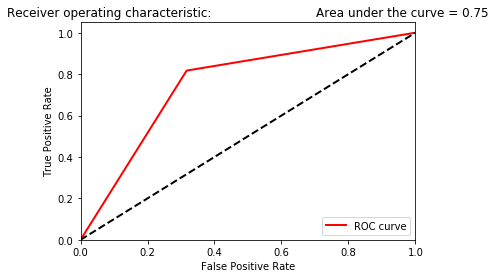

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tmpResult['New Data'], y, test_size=cutoff, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train[:5])

testresult = YinsDL.NN3_Classifier(
    X_train, y_train, X_test, y_test, 
    l1_act='relu', l2_act='relu', l3_act='softmax',
    layer1size=128, layer2size=64, layer3size=2,
    num_of_epochs=50, plotROC=True, verbose=True)

Tensorflow Version:
2.0.0
Summary of Network Architecture:
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_____________________________________________________________

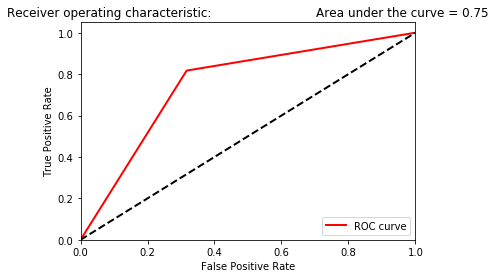

In [40]:
tmp = YinsDL.NN10_Classifier(
        X_train, y_train, X_test, y_test, 
        l1_act='relu', l2_act='relu', l3_act='relu', l4_act='relu', l5_act='relu',
        l6_act='relu', l7_act='relu', l8_act='relu', l9_act='relu', l10_act='softmax',
        layer1size=128, layer2size=64, layer3size=64, layer4size=64, layer5size=64, 
        layer6size=64, layer7size=64, layer8size=64, layer9size=64, layer10size=2,
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
        num_of_epochs=50,
        plotROC=True,
        verbose=True)

Tensorflow Version:
2.0.0
Shapes of X in training set (1000, 7, 3) Shapes of X in test set: (1000, 7, 3)
Summary of Network Architecture:
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 128)               1664      
_________________________________________________________________
dense_109 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_110 (Dense)            (None, 2)                 130       
Total params: 10,050
Trainable params: 10,050
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 0s 74us/sample - loss: 0.5909 - accuracy: 0.6750
Epoch 2/50
1000/1000 [==============================] - 0s 36us/sample - loss: 0.4902 - accuracy: 0.7500
Epoch 3/5

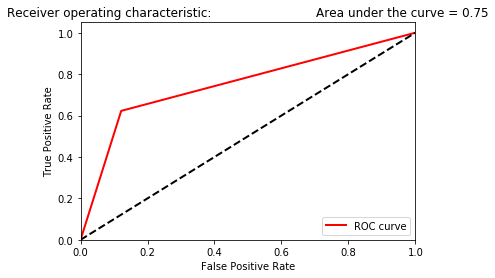

In [96]:
cnnTmpResult = YinsDL.C1NN3_Classifier(
        pd.concat([X_train, X_train, X_train], axis=1), y_train, 
        pd.concat([X_test, X_test, X_test], axis=1), y_test, 
        inputSHAPEwidth=7, inputSHAPElenth=3,
        filter1 = [[1,0], [0,1]],
        l1_act='relu', l2_act='relu', l3_act='softmax',
        layer1size=128, layer2size=64, layer3size=2,
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
        num_of_epochs=50,
        plotROC=True,
        verbose=True)

The performance is 77%. If this experiment is repeated many times, we should be able to hit average prediction rate of 75%. Why 75%? This is the exact theoretical prediction rate of the artificial example. In the underlying model $Y$, there are two modules. One of the correct module gives us at least 50% to start with. Since there is no marginal signal, the first module will perform 50% on the rest of the observations. This means correct theoretical prediction rate (the best you can do) is $75\% = 50\% + 50\% \times 50\%$). 

### Summary

As a conclusion, let us put everything together for performance comparison on the test set.

| Data (Which Variables To Use) | Algorithm | Performance  |
| -------------------------- |:---------:| ------------:|
| All the Original Data      | NN3       | 0.62 |
| All the Original Data      | NN10      | 0.60 |
| All the Original Data + Convolutional Features | C1NN3 (filter1)     | 0.51 |
| All the Original Data + Convolutional Features | C1NN3 (filter2)     | 0.60 |
| All the Original Data + Convolutional Features | C2NN3 (filter3)     | 0.60 |
| $[X_1, X_2], X^{\dagger}_{\{X_1, X_2\}}, [X_2, X_3, X_4], X^{\dagger}_{\{X_2, X_3, X_4\}}$ | NN3 | 0.75 |
| $[X_1, X_2], X^{\dagger}_{\{X_1, X_2\}}, [X_2, X_3, X_4], X^{\dagger}_{\{X_2, X_3, X_4\}}$ | NN10 | 0.75 |
| $[X_1, X_2], X^{\dagger}_{\{X_1, X_2\}}, [X_2, X_3, X_4], X^{\dagger}_{\{X_2, X_3, X_4\}}$ | C1NN3 | 0.75 |
| -------------------------- | --------- | ------------ |
| Theoretical Rate (Under Correct Model Specification)      | Any       | 0.75 |
| -------------------------- | --------- | ------------ |


Investigation ends here.